In [1]:
# Staple Inputs
import numpy as np
import pandas as pd
from pandas import DataFrame

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
dataset = pd.read_csv('../archive/Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


- Winning note: The closest neural network to the customer
- Minute 7:12, the nodes that are towards the ourside border of the image are the customers we are looking for. Most people respect the rules hence, their position in the middle of the graph
- We need the **Mean Inter-neuron Distance**

In [3]:
# Separating the X and y values
# We will not be using the y values (since this is an unsupervised learning)

X_features = dataset.loc[:, dataset.columns != 'Class']
y_target = dataset.loc[:,'Class']

In [4]:
#X_features.drop(labels='CustomerID', axis=1, inplace=True)

- Recall that when we make the model, we will only be using X (since this is an unsupervised training)

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

X_features = sc.fit_transform(X_features)

In [6]:
# Training the SOM, the SOM model is not used or created by sklearn

import sys
sys.path.insert(0, '/Users/alexguanga/All_Projects/ds-education/OnlineCourses/AZDeepLearning/code')
from minisom import MiniSom 

In [7]:
X_features.shape

(690, 15)

In [8]:
# The parameters are the dimension we would like the som to output
# input_len is the length of our X_features, do not include the ID (=14)
# sigma is the radius btw the diff neighborhood, the circle that surrounds the point

som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [9]:
som.random_weights_init(X_features)
som.train_random(data=X_features, num_iteration=100)

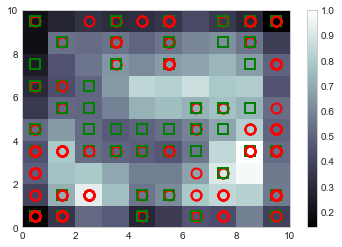

In [10]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

# The green squares represents people who did get approved
# The red cicles represents people who did not get approved

for i, x in enumerate(X_features):
    w = som.winner(x)
    plot(w[0] + 0.5, 
         w[1] + 0.5,
         markers[y_target[i]],
         markeredgecolor=colors[y_target[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

- The larger the Mean Neural Distance are, the more these nodes are outliers. 
- But the Mean Neural Distance is not sufficient to know. We also need to focus on where do the customer segment fall within.

In [11]:
# The dictionary contains each node
# Within each node, it represents the people that associated with those nodes
# People are represented by a list which has their characteristics

mapping = som.win_map(X_features)
#mapping[0,0] # An example of the a node (viewing its customers as well)

In [47]:
# We need to transform back the standarized data into its original form
frauds_mapping = np.concatenate((mapping[(2,1)], mapping[(8,4)]), axis=0)
frauds = sc.inverse_transform(frauds_mapping)

In [48]:
# Viewing all the customer that were considered an outlier (someone who does not have) but yet were 

pd.DataFrame(frauds).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15813718.0,1.0,42.83,1.25,2.0,7.0,4.0,13.875,0.0,1.0,1.0,1.0,2.0,352.0,113.0
1,15815271.0,1.0,27.58,3.25,1.0,11.0,8.0,5.085,0.0,1.0,2.0,1.0,2.0,369.0,2.0
2,15744273.0,1.0,22.67,0.75,2.0,3.0,4.0,1.585,0.0,1.0,1.0,1.0,2.0,400.0,10.0
3,15773934.0,1.0,32.92,2.50,2.0,6.0,4.0,1.750,0.0,1.0,2.0,1.0,2.0,720.0,1.0
4,15570990.0,1.0,29.42,1.25,2.0,8.0,8.0,0.250,0.0,1.0,2.0,1.0,2.0,400.0,109.0


- The idea is to think of the different values as outliers.
- The more different it is from the original dataset, the more we have to focus on it.

### Modifying the Model: Unsupervised to Supervised

In [95]:
dataset.head(5)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [60]:
# Storing the customers from the bank
customers = dataset.loc[:, dataset.columns != 'CustomerID']
customers.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [61]:
customers.shape

(690, 15)

In [62]:
# Creating the dependent variable
# Will have to be if the outcome was fraud (1) or not (0)

is_fraud = np.zeros(len(dataset))

for row, col in dataset.iterrows():
    if col['CustomerID'] in frauds:
        is_fraud[row] = 1
    

In [63]:
# Featuring Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [64]:
# Training the model
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# Adding the input layer
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=15))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN: finding the best weight to use
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model in the training set
classifier.fit(customers, is_fraud, batch_size=1, epochs=2)

predicitions = classifier.predict(customers)

Epoch 1/2
690/690 [==============================] - 1s 2ms/step - loss: 0.4685 - acc: 0.9739
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.2384 - acc: 0.9754


In [92]:
customer_ID = dataset['CustomerID'].values.reshape(690, 1)
predicitions = np.concatenate((customer_ID, predicitions), axis=1)

In [128]:
df_predictions = pd.DataFrame(predicitions, columns=[['CustomerID', 'Predictions']])

In [124]:
df_predictions.head(5)

,CustomerID,Predictions
0,15776156.0,0.063513
1,15739548.0,0.028614
2,15662854.0,0.019865
3,15687688.0,0.307127
4,15715750.0,0.307127


In [137]:
predicitions= predicitions[predicitions[:1].argsort()]

In [167]:
df_predictions # You would have to output to Excel

,CustomerID,Predictions
0,15776156.0,0.063513
1,15739548.0,0.028614
2,15662854.0,0.019865
3,15687688.0,0.307127
4,15715750.0,0.307127
5,15571121.0,0.196438
6,15726466.0,0.022585
7,15660390.0,0.307127
8,15663942.0,0.035140
9,15638610.0,0.307127
